In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt


In [2]:
Games_dados = pd.read_csv("../dados/GamesDados_v2.csv")

### Variavel a ser Predita - Vendas

In [3]:
Games_dados['Vendas'] = Games_dados.Global_Sales_GenMed.map(lambda x: x > 0.999999 and 'Alto' or 'Baixo')

### Grafico mostrando a distribuição de Vendas em pares

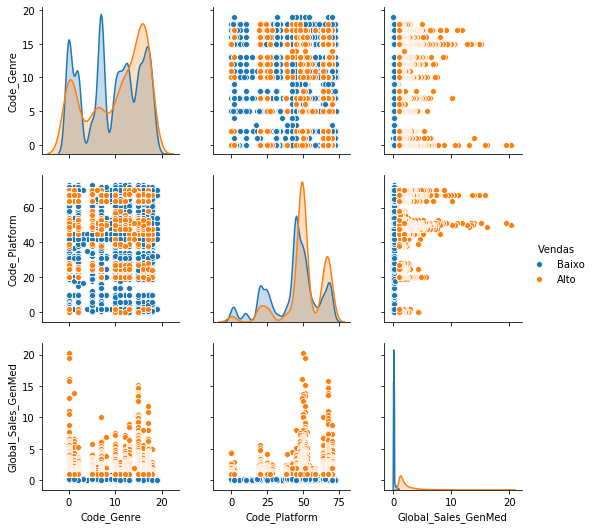

In [4]:
sns.pairplot(Games_dados[['Code_Genre', 'Code_Platform', 'Global_Sales_GenMed','Vendas']], hue='Vendas')

In [5]:
variaveis_predicao = ['Code_Genre','Code_Platform','Global_Sales_GenMed']

target = Games_dados['Vendas']

In [6]:
from sklearn import svm
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df[list_of_x_cols], df[y_col],test_size=0.2)

In [7]:
# Variaveis usadas para prever
X = Games_dados[variaveis_predicao]
# Target - variavel a ser predita
Y = target

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.5,random_state=13)

In [38]:
model_SVM = svm.SVC()

In [39]:
model_SVM.fit(X_train,Y_train)

C:\Users\Usuário\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [40]:
y_predicao = model_SVM.predict(X_test)   

In [41]:
from sklearn.metrics import accuracy_score
y_predicaoTrain = model_SVM.predict(X_train)
print("ACC TRAINING:" + str(accuracy_score(Y_train, y_predicaoTrain)))
print("ACC TEST:" + str(accuracy_score(Y_test, y_predicao)))

ACC TRAINING:0.996988815600803
ACC TEST:0.9939417837682822


In [42]:
#usando cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(model_SVM, X, Y, cv=3)

C:\Users\Usuário\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Usuário\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Usuário\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([0.92961609, 0.995752  , 0.97800721])

In [48]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predicao,output_dict=True))

{'Alto': {'precision': 0.9938271604938271, 'recall': 0.796044499381953, 'f1-score': 0.8840082361015786, 'support': 809}, 'Baixo': {'precision': 0.9939445096887844, 'recall': 0.9998523276848673, 'f1-score': 0.9968896659611668, 'support': 27087}, 'accuracy': 0.9939417837682822, 'macro avg': {'precision': 0.9938858350913058, 'recall': 0.8979484135334102, 'f1-score': 0.9404489510313727, 'support': 27896}, 'weighted avg': {'precision': 0.993941106494824, 'recall': 0.9939417837682822, 'f1-score': 0.9936160397510861, 'support': 27896}}


In [56]:
metricas = (classification_report(Y_test, y_predicao,output_dict=True))
macro_precision =  metricas['macro avg']['precision'] 
macro_recall = metricas['macro avg']['recall']    
macro_f1 = metricas['macro avg']['f1-score']

predicted_labels_list = Y.unique()

print(macro_precision,macro_recall,macro_f1)
print(predicted_labels_list)

for label in predicted_labels_list:
    print(label+" Precision: ",metricas[label]['precision'])
    print(label+" Recall: ",metricas[label]['recall'])
    print(label+" F1-Score: ",metricas[label]['f1-score'])


0.9938858350913058 0.8979484135334102 0.9404489510313727
['Baixo' 'Alto']
Baixo Precision:  0.9939445096887844
Baixo Recall:  0.9998523276848673
Baixo F1-Score:  0.9968896659611668
Alto Precision:  0.9938271604938271
Alto Recall:  0.796044499381953
Alto F1-Score:  0.8840082361015786


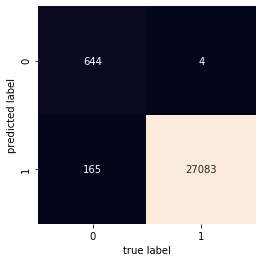

In [44]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, y_predicao)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');